In [13]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt    
from sklearn import metrics 
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from datetime import date



In [14]:
def load_dataset(file_name, target_column):
    df = pd.read_csv(file_name, index_col=0)
    TRAINING_FEATURES = df.columns[df.columns != target_column]
    TARGET_FEATURE = target_column
    
    X=df[TRAINING_FEATURES]
    y=df[TARGET_FEATURE] / 1000
    
    return X,y
#=============================================
def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    
    return X_train, X_test, y_train,y_test

#=============================================
def evaluate_performance_1st(y_test,y_predicted):
    evaluate_value = r2_score(y_test,y_predicted)
    return evaluate_value
#=============================================
def manipulate_feature_vector(X):

    #Scatter the date into several columns
    X['Year'] = pd.DatetimeIndex(X['Date']).year
    X['Month'] = pd.DatetimeIndex(X['Date']).month
    X['Day'] = pd.DatetimeIndex(X['Date']).day
    X['year_of_employment'] = X['Year'] - X['Seniority']
    X.drop('Date', axis=1, inplace=True)

    seniority_rank = []

    for seniority in X['Seniority']:
      if seniority<=1:
        seniority_rank.append(0)

      elif seniority<=3:
        seniority_rank.append(1)

      else:
        seniority_rank.append(2)
              
    is_student=[]

    for role in X['Role']:
      if role == 'Software Student':
        is_student.append(1)
      else:
        is_student.append(0)

    is_manager = []
    ManagmentRoles=['Team Leader','Software Engineer','DevOps']
    
    for role in X['Role']:
      if role in ManagmentRoles:
        is_manager.append(1)
      else:
        is_manager.append(0)

    is_military_company = []
    militaryCompanys=['רפאל', 'אווירית תעשייה', 'צה"ל','מטריקס','גלובל מטריקס']

    for company in X['Company']:
      if company in militaryCompanys:
        is_military_company.append(1)
      else:
        is_military_company.append(0)

    is_GAMFA = []

    GAMFA_Comapnies = ['גוגל', 'מיקרוסופט', 'אפל', 'אמזון']
    for company in X['Company']:
      if company in GAMFA_Comapnies:
        is_GAMFA.append(1)
      else:
        is_GAMFA.append(0)

      
    
    #Add new columns
    X["is_military_company"] = is_military_company
    X['seniority_rank'] = seniority_rank
    X['is_student'] = is_student
    X['is_manager'] = is_manager
    X['is_GAMFA'] = is_GAMFA

    #Encode
    le1 = LabelEncoder()
    le2 = LabelEncoder()
    le3 = LabelEncoder()
    X['Company'] = le1.fit_transform(X["Company"])
    X['Role'] = le2.fit_transform(X["Role"])
    EncodedCompanies = dict(zip(le1.classes_, le1.transform(le1.classes_)))
    EncodedRoles = dict(zip(le2.classes_, le2.transform(le2.classes_)))
    

    return X, EncodedCompanies, EncodedRoles


**Split data**

In [15]:
X,y = load_dataset('/content/drive/Othercomputers/ה-מחשב נייד שלי/Desktop/Python Project/old_data/high_tech_data.csv', 'Salary')

X, EncodedCompanies, EncodedRoles = manipulate_feature_vector(X)
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=10, test_size=0.20)

X

,Role,Seniority,Company,Year,Month,Day,year_of_employment,is_military_company,seniority_rank,is_student,is_manager,is_GAMFA
0,16,1,1709,2021,12,10,2020,0,0,0,0,0
1,15,11,626,2021,12,10,2010,0,2,0,1,0
2,4,10,1217,2021,12,10,2011,1,2,0,0,0
3,2,1,340,2021,12,10,2020,0,0,0,0,0
4,16,0,1709,2021,12,10,2021,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13908,3,4,266,2015,1,4,2011,0,2,0,0,0
13909,16,4,468,2015,1,4,2011,0,2,0,0,0
13910,0,4,1359,2015,1,4,2011,0,2,0,0,0
13911,0,4,1199,2015,1,4,2011,0,2,0,0,0


# **Linear Regression**

In [16]:
reg = LinearRegression()
reg.fit(X_train,y_train)

ypred_lr = reg.predict(X_test)
resDF=pd.DataFrame({"Actual":y_test,"Predicted":ypred_lr})

evaluate_value = evaluate_performance_1st(y_test,ypred_lr)
mse = metrics.mean_squared_error(y_test, ypred_lr)

print(f"r2_score: {evaluate_value}")
print(f"mse: {mse}")

r2_score: 0.48529110892058014
mse: 37.90360596220629


[Text(0, 0.5, 'Test'), Text(0.5, 0, 'Prediction')]

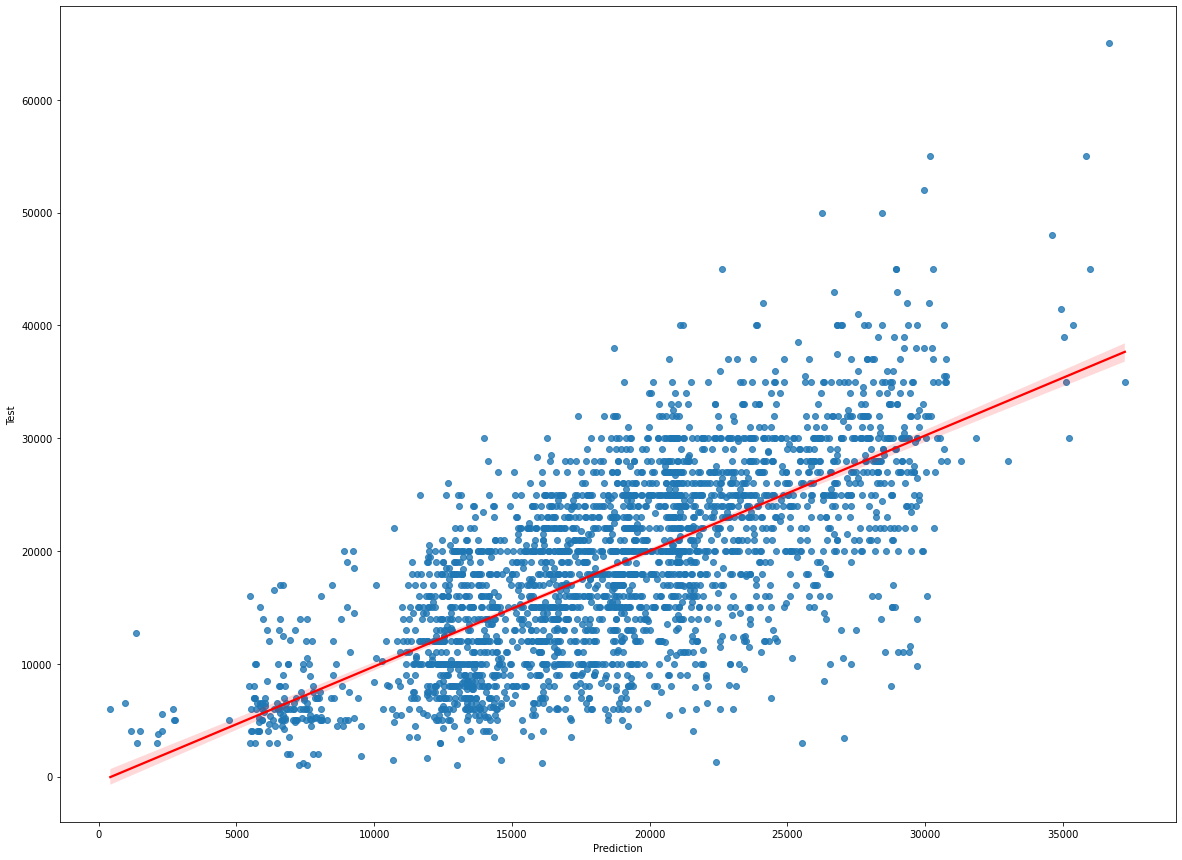

In [17]:
f, ax = plt.subplots(figsize=(20, 15))
sns.regplot(x=ypred_lr*1000, y=y_test*1000, data=X, ax=ax, line_kws={"color": "red"});
ax.set(xlabel='Prediction', ylabel='Test')

# **Random Forest Regressor**

In [18]:
rfr = RandomForestRegressor(n_estimators=550, random_state=11, max_depth=10)
rfr.fit(X_train,y_train)

ypred_rfr = rfr.predict(X_test)
resDF=pd.DataFrame({"Actual":y_test,"Predicted":ypred_rfr})

evaluate_value_rfr = evaluate_performance_1st(y_test,ypred_rfr)
mse = metrics.mean_squared_error(y_test, ypred_rfr)
mse = metrics.mean_squared_error(y_test, ypred_rfr)

print(f"r2_score: {evaluate_value_rfr}")
print(f"mse: {mse}")


r2_score: 0.535818807285251
mse: 34.18270274451506


[Text(0, 0.5, 'Test'), Text(0.5, 0, 'Prediction')]

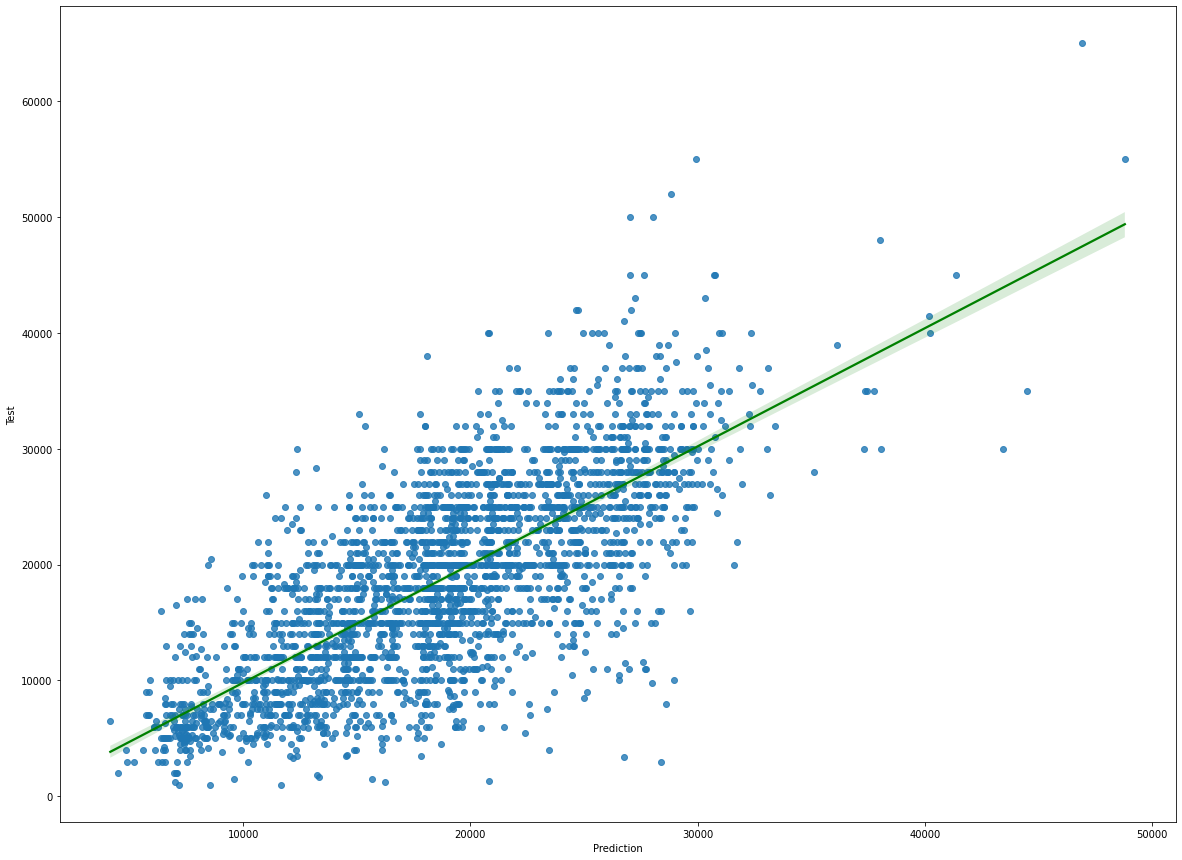

In [19]:
f, ax = plt.subplots(figsize=(20, 15))
sns.regplot(x=ypred_rfr*1000, y=y_test*1000, data=X, ax=ax, line_kws={"color": "green"});
ax.set(xlabel='Prediction', ylabel='Test')

**We see that the prediction worked quite well, indeed a linear trend can be seen, the prediction using Random Forest is slightly better.**

In [20]:
#Predcit salaries
def predicted_salaries(Role, Seniority, Company, clf):

  #Get current date
  today = date.today()
  full_date = today.strftime("%d/%m/%y")

  #JSON
  raw_data = {'Role': [Role],'Date' : [full_date], 'Seniority': [Seniority], 'Company' : [Company] }

  #To DataFrame
  df = pd.DataFrame(raw_data)

  #Convert Date column into datetime
  df['Date'] = pd.to_datetime(df.Date)

  #Manipulate feature vector
  df,  EncodedCompany, EncodedRoles  = manipulate_feature_vector(df)

  #Prediction
  prediction = clf.predict(df)

  print(f'The expected salary for {Role} with {Seniority} seniority at {Company} is about: {round(prediction[0]*1000, 3)} shekels')

predicted_salaries('Software Engineer', 3, 'צה"ל', rfr)
predicted_salaries('Software Engineer', 3, 'גוגל', rfr)
predicted_salaries('Team Leader', 6, 'רפאל', rfr)
predicted_salaries('Software Student', 1, 'אינטל', rfr)


The expected salary for Software Engineer with 3 seniority at צה"ל is about: 16894.475 shekels
The expected salary for Software Engineer with 3 seniority at גוגל is about: 28947.785 shekels
The expected salary for Team Leader with 6 seniority at רפאל is about: 21694.48 shekels
The expected salary for Software Student with 1 seniority at אינטל is about: 10698.063 shekels
